## Credit Card Fraud Detection
### Author: Samikshya Sapkota 

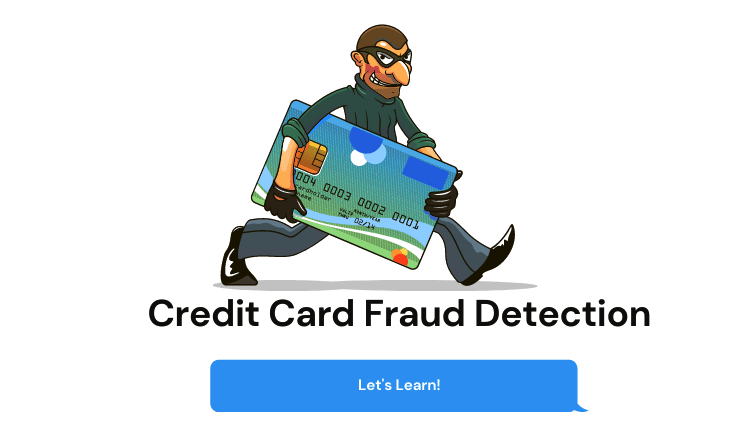

In [1]:
from PIL import Image #To read the image
Image.open("CC Fraud.png")

### Overview 
   Credit card fraud detection has become one of the most important aspects in this era of digital payment as we move towards a cashless society. Fraudsters have developed new and ingenious tactics to gain access to credit cardholders' financial information over time.Therefore, online consumers have been facing various credit card fraudulent activities since the introduction of credit card transactions. It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.
   
   As an undergraduate who has profound interest in Cybersecurity, I am an enthusiast to work on the ongoing issue (i.e credit card fraud) in cyber market, hence I decided to build a credit card fraud detection algorithm. 
   
   Stay tuned !!
     

### The Dataset
The following dataset has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group of ULB (Université Libre de Bruxelles) on big data mining and fraud detection. The credit card transaction dataset that is being used contains <u>Anonymized</u> credit card transactions labeled as Fradulent(1) or Genuine(0) made by credit cards in September 2013 by European cardholders.

We obtained this dataset from https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud



### Reading the data and importing the necessary libraries as required


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [3]:
read_data = pd.read_csv("creditcard.csv")

In [4]:
read_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
#Check for any null values in the entire dataset 
read_data.isnull().values.any()


#There are no null values in the dataset, hence we do not have to worry about trimming the dataset 
#in terms of null values.

False

In [6]:
print(read_data)

            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.01830

### Observation:
The dataset contains only numerical values which are the result of Principal Component Analysis(PCA) transformation as described in the website. The reason for performing a PCA transformation was that information about credit cards is confidential and therefore, the authors who created the dataset decided to transform the orginal features into PCA components such as V1, V2, V3 ... V28.






In [7]:
read_data[read_data['Class'] == 1]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


Here, we observed that out of 281674 transactions 492 transactions were reported as fraudulent which is basically 492/281674 = 0.172% of the total transactions. The dataset is highly unbalance i.e the fraudulent transactions represent a small fraction of the total transactions. 



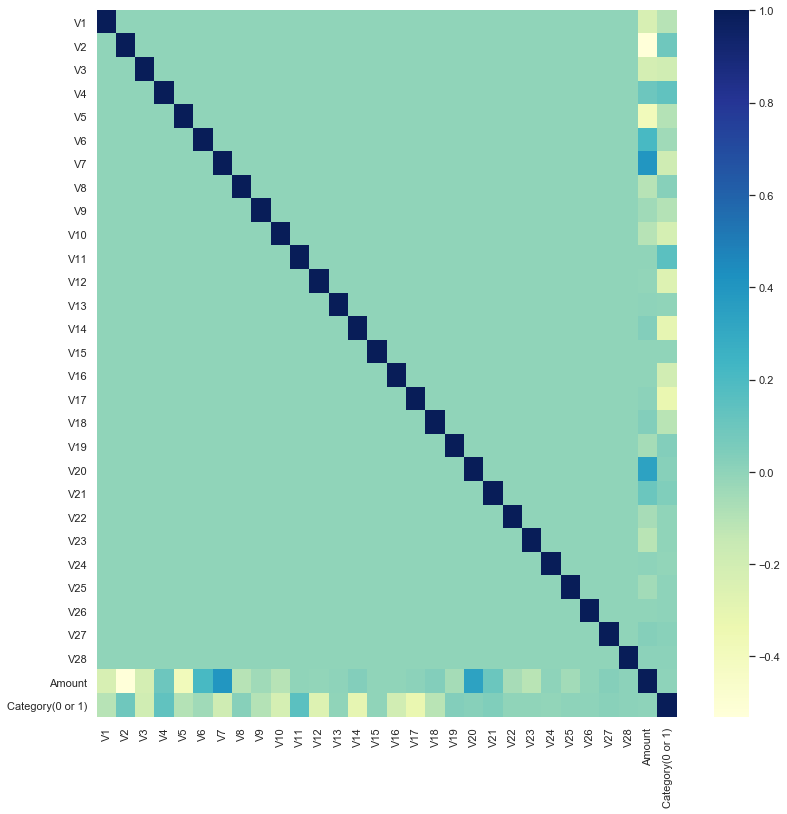

In [21]:
#Heatmap showing how the features are correlated to each other
sns.heatmap(read_data.corr(), cmap="YlGnBu")
sns.set(rc={'figure.figsize':(13,13)})




#### It can be observed that these features have some impact on the Category in the following ways:
- Features like V2, V4, V8, V11 are blue-ish conveying that these are positively correlated to category
- Features like V3, V7, V10, V12, V14, V16,V17 are yellow-ish conveying that these are negatively coorelated to category. 
- The rest of the features have no impact on the category, i.e that they are deemed to be neutral.

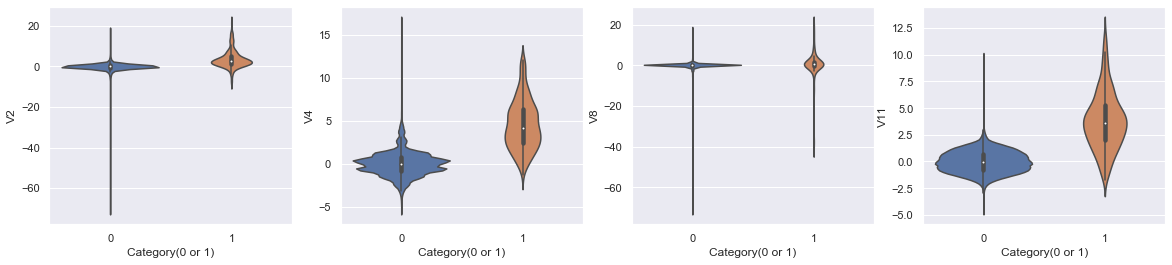

In [45]:
#Violin plots
#############Add interpretation later
f, axes = plt.subplots(ncols=4, figsize=(20,4))
sns.violinplot(x="Category(0 or 1)", y="V2", data=read_data, ax = axes[0])
sns.violinplot(x="Category(0 or 1)", y="V4", data=read_data, ax = axes[1])
sns.violinplot(x="Category(0 or 1)", y="V8", data=read_data, ax = axes[2])
sns.violinplot(x="Category(0 or 1)", y="V11", data=read_data, ax = axes[3])


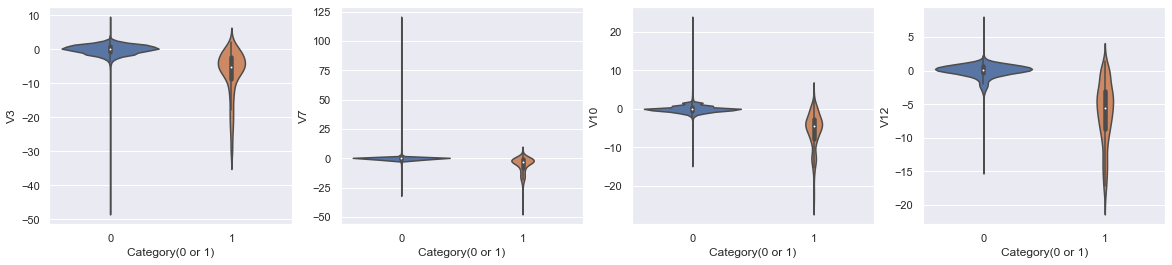

In [46]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))
sns.violinplot(x="Category(0 or 1)", y="V3", data=read_data, ax = axes[0])
sns.violinplot(x="Category(0 or 1)", y="V7", data=read_data, ax = axes[1])
sns.violinplot(x="Category(0 or 1)", y="V10", data=read_data, ax = axes[2])
sns.violinplot(x="Category(0 or 1)", y="V12", data=read_data, ax = axes[3])


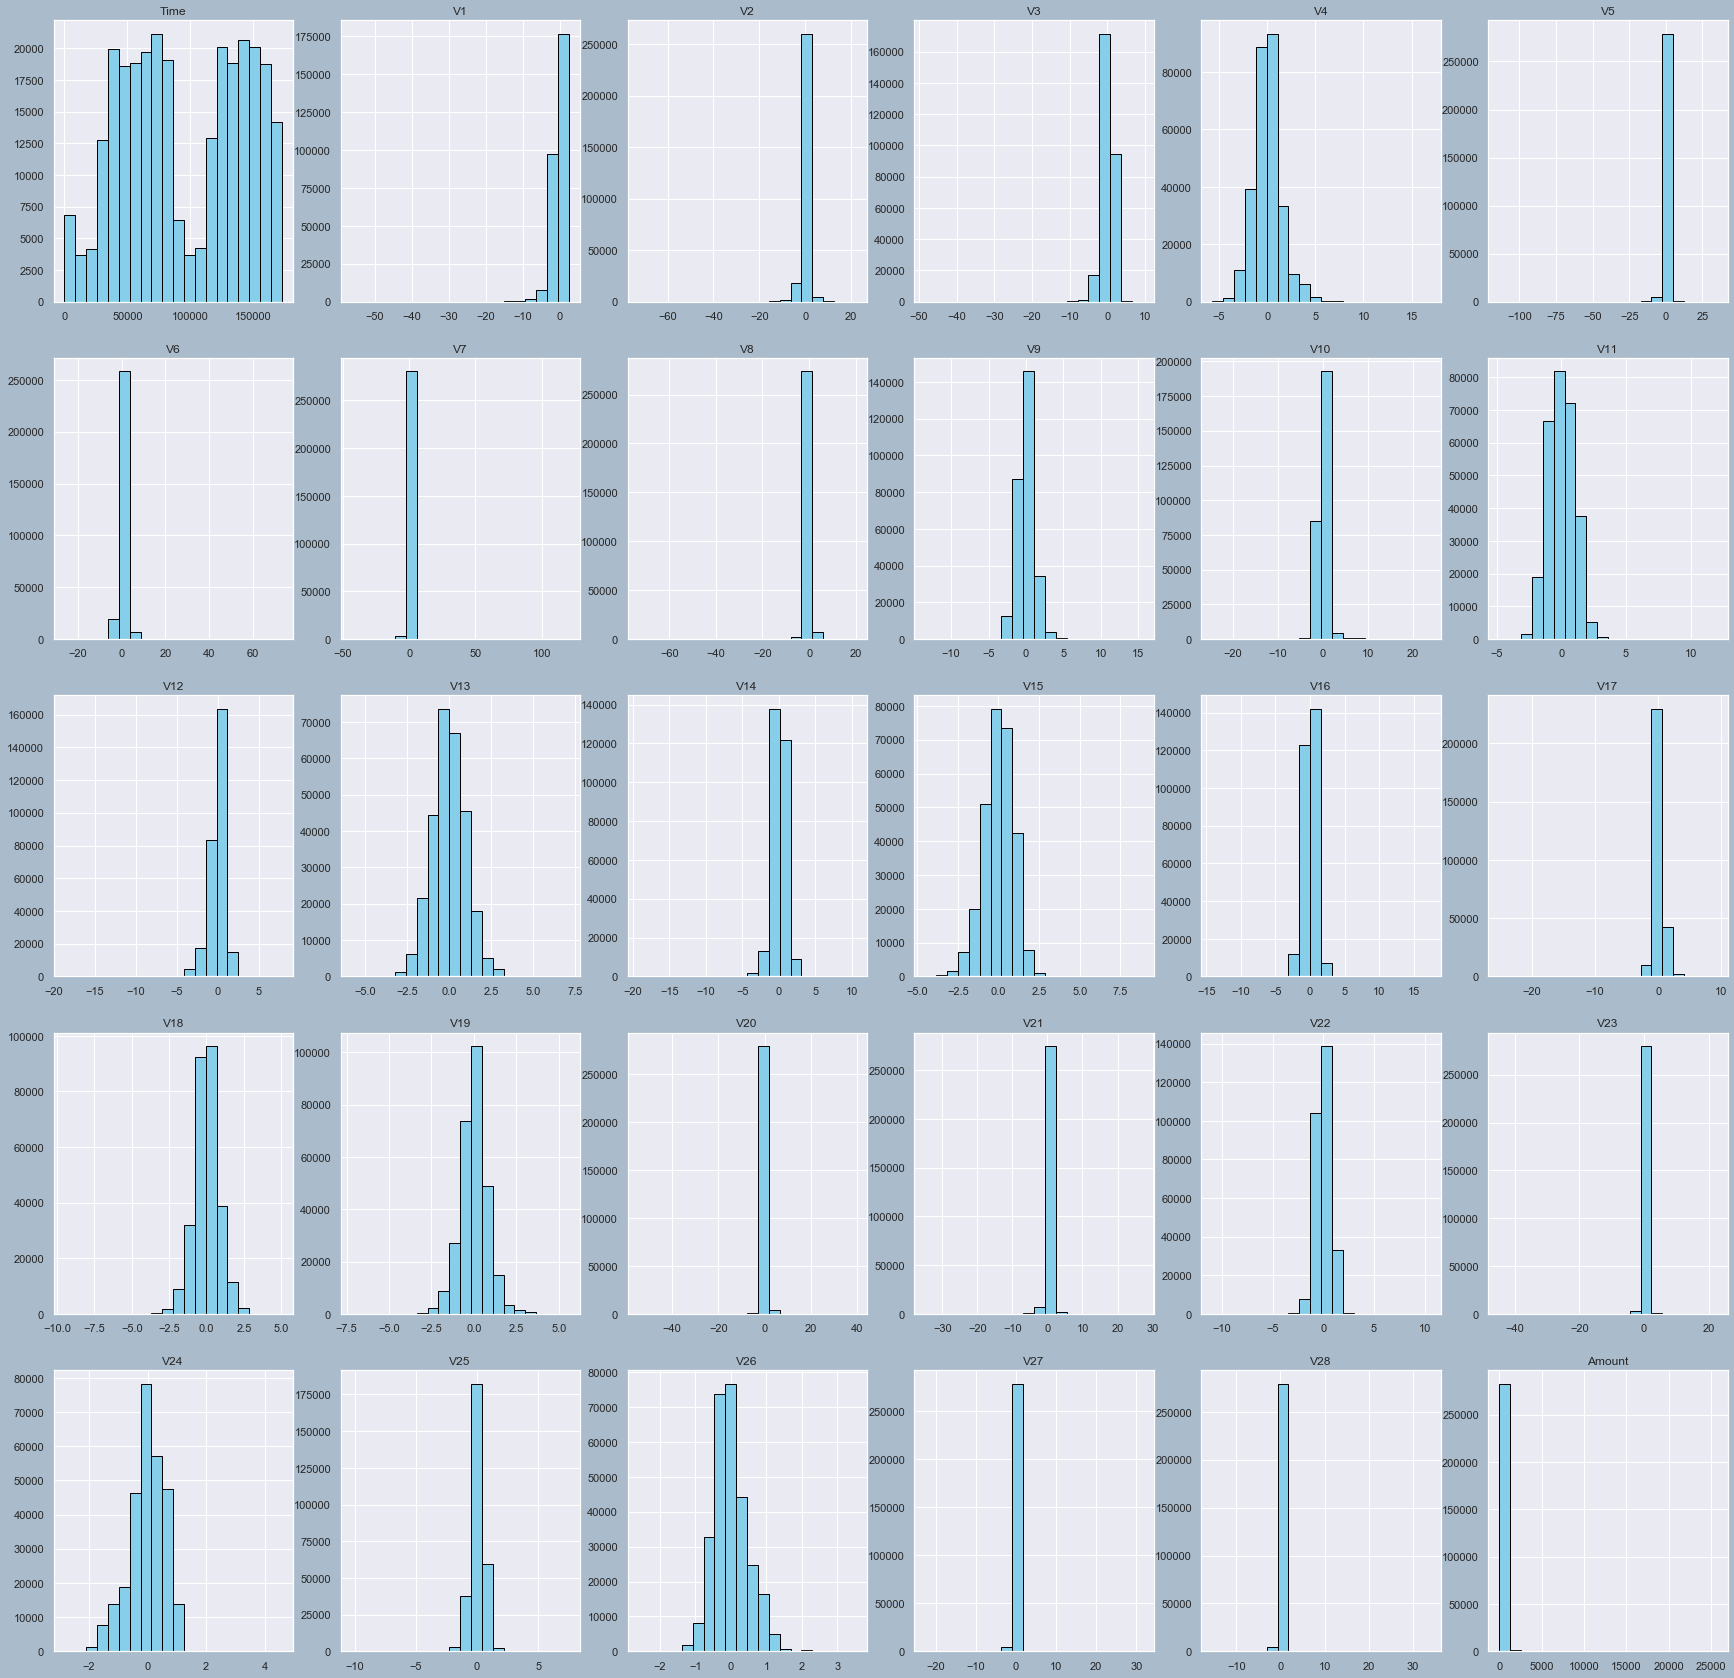

In [9]:
#Bar Plots for V1, V2.....V29

fig = plt.figure(figsize=(30,30)) 
grid = fig.add_gridspec(5,6)

subplot_list = []
for x in range(0,5):
    for y in range(0,6):
        subplot_list.append(fig.add_subplot(grid[x,y]))


fig.patch.set_facecolor("#aabbcc")
cols = read_data.columns



for col, subplot in zip(cols, subplot_list):
    subplot.hist(read_data[col], bins = 20, ec="black", color = "skyblue")
    subplot.set_title(col)
    
plt.show()

#### Observation: In our dataset, all the V features have been scaled or at least that is what we are assuming the people that develop the dataset did).  The 'Amount' does not have uniformity in its spread of its data let's explore this in more detail and see how we can move forward in terms of scaling the data. Let's make a barplot of 'Amount' variable just so that we get a "bigger" picture of it and let us also see how the statistics are for this column. From the results below, the standard deviation is too high which results in a lot of spread of data, so it makes sense to transform this feature or rather normalize it. We will do so by using sklearn's StandardScaling method

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

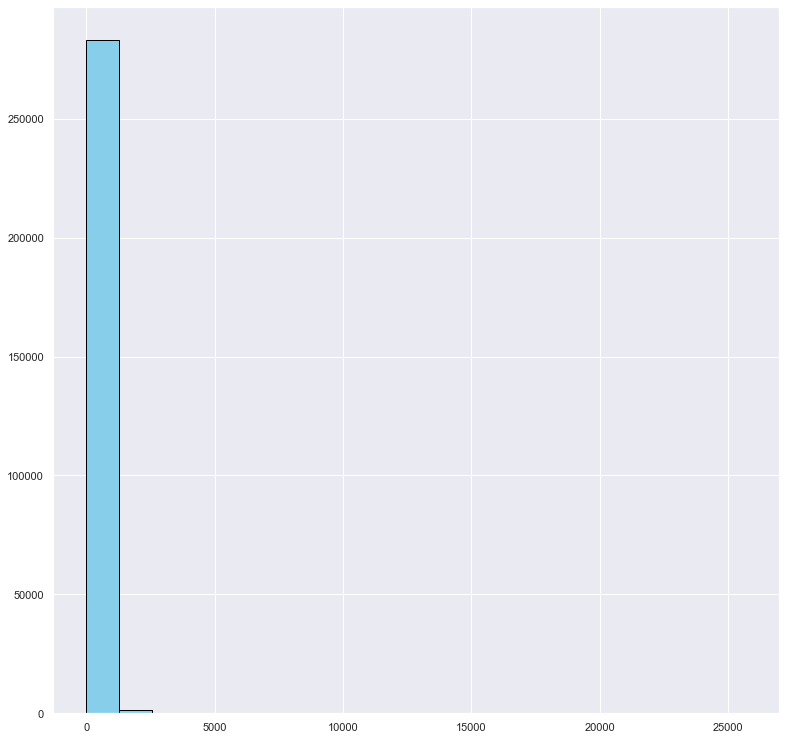

In [10]:
plt.hist(read_data['Amount'], bins = 20, ec="black", color = "skyblue")

read_data.describe()['Amount']

In [11]:
scaler = StandardScaler()
amount = read_data['Amount'].values

read_data['Amount'] = scaler.fit_transform(amount.reshape(-1, 1))


In [12]:
read_data['Amount']

0         0.244964
1        -0.342475
2         1.160686
3         0.140534
4        -0.073403
            ...   
284802   -0.350151
284803   -0.254117
284804   -0.081839
284805   -0.313249
284806    0.514355
Name: Amount, Length: 284807, dtype: float64

count    2.848070e+05
mean     3.202236e-16
std      1.000002e+00
min     -3.532294e-01
25%     -3.308401e-01
50%     -2.652715e-01
75%     -4.471707e-02
max      1.023622e+02
Name: Amount, dtype: float64

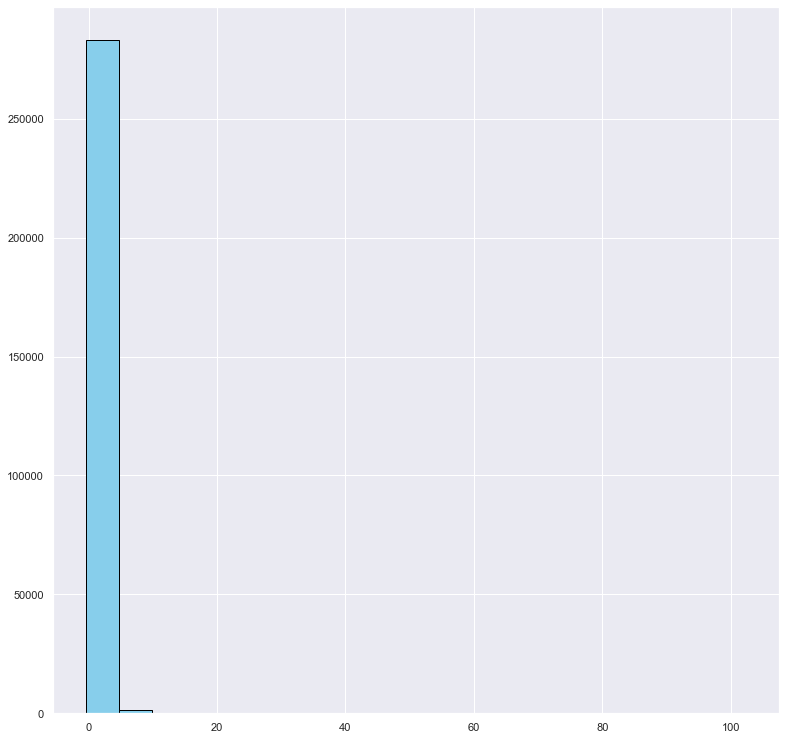

In [20]:
plt.hist(read_data['Amount'], bins = 20, ec="black", color = "skyblue")

read_data.describe()['Amount']

## Data Pre-Processing 

In [14]:
#Renaming a few columuns for Simplicity. 
read_data = read_data.rename(columns={'Class': 'Category(0 or 1)',})

In [15]:
read_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Category(0 or 1)
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [16]:
read_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Category(0 or 1)
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,3.202236e-16,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,1.000002e+00,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,-3.532294e-01,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,-3.308401e-01,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,-2.652715e-01,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,-4.471707e-02,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,1.023622e+02,1.000000


In [17]:
read_data['Time']

0              0.0
1              0.0
2              1.0
3              1.0
4              2.0
            ...   
284802    172786.0
284803    172787.0
284804    172788.0
284805    172788.0
284806    172792.0
Name: Time, Length: 284807, dtype: float64


### It can be observed that the 'Time' column does not offer any meaningful insight for this dataset so it makes sense to drop the time column and we can focus on the rest of the PCA features that is V1, V2, V3.

In [18]:
read_data.drop('Time', axis = 1, inplace = True)


In [19]:
read_data.shape

(284807, 30)

### Now the dataset has 30 columns - 29 input features and 1 output feature. I tried plotting pair plots for all the features using sns.pairplot but it looks like it was pretty clustered  😔 (900 total plots), hence I thought it would be best to pick a few random columns along with the Category too see how these feature are related

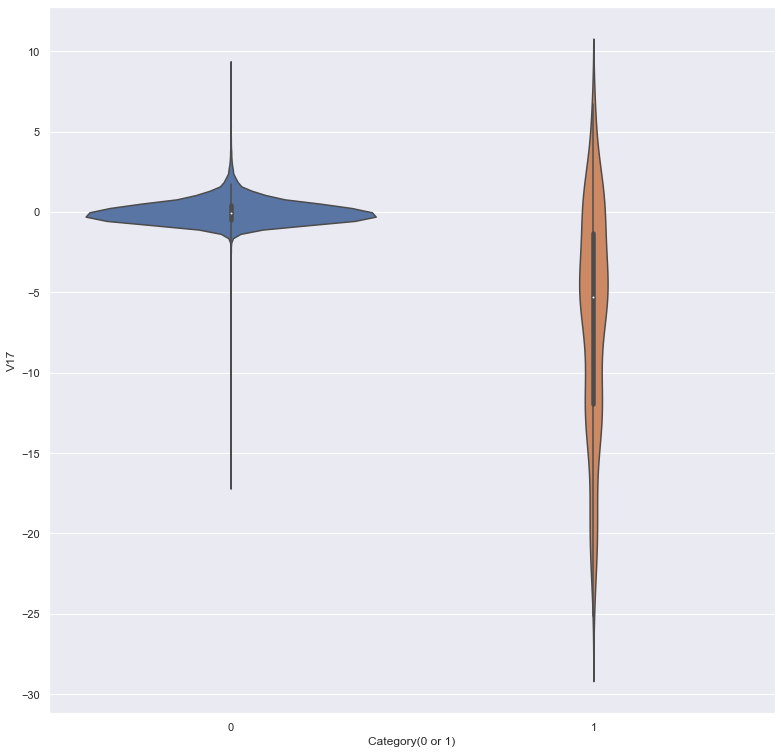

In [30]:
sns.violinplot(x="Category(0 or 1)", y="V17", data=read_data)
